In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error
from flask import Flask, request, jsonify, render_template
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
data = pd.read_csv('../data/Ground Water .csv')

In [8]:
numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


# Select only numeric columns for quantile calculations
numeric_data = data.select_dtypes(include=[np.number])
data[numeric_data.columns] = numeric_data.clip(lower=numeric_data.quantile(0.01), upper=numeric_data.quantile(0.99), axis=1)


# Encode categorical variables
data = pd.get_dummies(data)

# Scale numerical variables
scaler = StandardScaler()
data[data.select_dtypes(include=['float64']).columns] = scaler.fit_transform(data.select_dtypes(include=['float64']))


data = data.drop(data.columns[[1, 2]], axis=1)
X = data.iloc[:,:-3]
y = data.iloc[:, -1]
#print("\nX")
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    Station Code    pH Min    pH Max  Conductivity (µmhos/cm) Min  \
0       0.338985  0.208298 -0.143048                    -0.431640   
1       0.338154  0.413193  1.213569                    -0.494694   
2       1.391339  1.027880  0.632161                    -0.357749   
3       0.337324 -0.406389 -0.724455                     0.799876   
4       1.385525  1.437671  1.213569                     0.464903   
5       0.334002  0.618089  0.632161                     0.155054   
6       1.387186  1.437671  1.019766                    -0.520309   
7       1.386355  0.413193  0.244557                     4.112358   
8       1.419579 -0.611285 -0.724455                    -0.065141   
9       1.419977 -0.406389 -0.724455                     0.907264   
10      1.405459  1.847462  1.213569                     0.088552   
11     -0.968359 -0.201494 -0.336850                     0.076729   
12     -0.969189  0.003402 -0.336850                     2.415132   
13      1.394661  0.822984  0.2445

In [10]:
print("\nx:",X_train)

print("\ny: ")
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choose a model to use
model = LinearRegression()

# Split the dataset into k-folds
kf = KFold(n_splits=5, shuffle=True)

# Perform cross-validation
mse_scores = []
for train_index, test_index in kf.split(X_train):
    # Split the data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    # Train the model on the training set and test it on the testing set
    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_test_fold)
    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)
   
# Compute the average mean squared error across all folds
avg_mse = sum(mse_scores) / len(mse_scores)
#print("\navgmse: ",avg_mse)



Y_train=np.unique(y_train_fold)
#y_train=y_train.reshape(-1,1)
#print("\nunique: ",y_train)
#print("\nunique shape: ",y_train.shape)
#print("\nlength unique shape: ",len(y_train))




x:     Station Code    pH Min    pH Max  Conductivity (µmhos/cm) Min  \
22     -0.970850  1.847462  1.213569                    -0.313415   
7       1.386355  0.413193  0.244557                     4.112358   
14     -0.266097  0.003402  0.050754                    -0.321296   
34     -0.953408 -0.406389 -0.530653                    -0.709470   
48     -0.194252 -0.406389 -0.724455                    -0.293711   
18     -0.965036 -0.406389  0.244557                    -0.692722   
50      0.423705  1.437671  0.825964                    -0.795676   
35     -0.951747  0.413193  0.050754                    -0.695677   
15      1.383033 -0.201494 -0.724455                    -0.283858   
5       0.334002  0.618089  0.632161                     0.155054   
28      0.336493 -1.021076  0.244557                    -0.052333   
16      1.411273  0.003402 -0.336850                     3.632362   
45     -0.536454  0.003402 -0.336850                    -0.596663   
20     -0.967528  0.208298 -0.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from functools import partial
import numpy as np


def f(X):
    A = 10
    sol = []
    for ind in X:
        sol.append(A*len(ind) + sum([(i**2 - A * np.cos(2 * np.pi * i)) for i in ind]) )#output-Y

    return np.array(sol)
x_lb=y_lb=-500
x_ub=y_ub=500








class WOA:
    def __init__(self, obj_func, n_whale, spiral_constant, n_iter,lb, ub,W):
        self.obj_func = obj_func
        self.n_whale = n_whale
        self.spiral_constant = spiral_constant
        self.n_iter = n_iter
        #print('--------------------')
        self.whale = {}
        self.prey = {}
        self.W=W
        #print('----------------------------')
        self.lb = np.array([x_lb, y_lb])

        self.ub = np.array([x_ub, y_ub])

    def init_whale(self):
        tmp = [np.random.uniform(self.lb, self.ub, size=(len(self.lb),))
             for i in range(self.n_whale)]
        print("\n temp:",tmp)
        self.whale['position'] = np.array(tmp)
        self.whale['fitness'] = self.obj_func(self.whale['position'])

    def init_prey(self):
        
        tmp = [np.random.uniform(self.lb, self.ub, size=(len(self.lb),))]
       
        self.prey['position'] = np.array(tmp)
        self.prey['fitness'] = self.obj_func(self.prey['position'])

   
    def update_prey(self):
        if self.whale['fitness'].min() < self.prey['fitness'][0]:
            self.prey['position'][0] = self.whale['position'][self.whale['fitness'].argmin()]
            self.prey['fitness'][0] = self.whale['fitness'].min()

    def search(self, idx, A, C):
        random_whale = self.whale['position'][np.random.randint(low=0, high=self.n_whale,
                                                                size=len(idx[0]))]
        d = np.abs(C[..., np.newaxis] * random_whale - self.whale['position'][idx])
        self.whale['position'][idx] = np.clip(random_whale - A[..., np.newaxis] * d, self.lb, self.ub)

    def encircle(self, idx, A, C):
        #d = np.abs(C[..., np.newaxis] * self.prey['position'].reshape(1, -1) - self.whale['position'][idx])
        d = np.abs(np.reshape(C, (-1, 1)) * self.prey['position'].reshape(1, -1) - self.whale['position'][idx])

        self.whale['position'][idx] = np.clip(self.prey['position'][0] - A[..., np.newaxis] * d, self.lb, self.ub)

    def bubble_net(self, idx):
        d_prime = np.abs(self.prey['position'] - self.whale['position'][idx])
        l = np.random.uniform(-1, 1, size=len(idx[0]))
        self.whale["position"][idx] = np.clip(
            d_prime * np.exp(self.spiral_constant * l)[..., np.newaxis] * np.cos(2 * np.pi * l)[..., np.newaxis]
            + self.prey["position"],
            self.lb,
            self.ub,
        )

    def optimize(self, a):

        p = np.random.random(self.n_whale)
        r1 = np.random.random(self.n_whale)
        r2 = np.random.random(self.n_whale)
        A = 2 * a * r1 - a
        C = 2 * r2
        search_idx = np.where((p < 0.5) & (abs(A) > 1))
        encircle_idx = np.where((p < 0.5) & (abs(A) <= 1))
        bubbleNet_idx = np.where(p >= 0.5)
        self.search(search_idx, A[search_idx], C[search_idx])
        self.encircle(encircle_idx, A[encircle_idx], C[encircle_idx])
        self.bubble_net(bubbleNet_idx)
        self.whale['fitness'] = self.obj_func(self.whale['position'])

    def run(self):
        self.init_whale()
        self.init_prey()
        f_values = [self.prey['fitness'][0]]
        #print("\n\n\n\n\noptimal sol: ",self.prey['position'][0])
        for n in range(self.n_iter):
            #print("Iteration = ", n, " f(x) = ", self.prey['fitness'][0])
            a = 2 - n * (2 / self.n_iter)
            self.optimize(a)
            self.update_prey()
            #l.append((self.loss(out, y_wt)))
            #acc.append(abs((1-(sum(l)/len(x)))*10))
            f_values.append(self.prey['fitness'][0])
           
        optimal_x = self.prey['position'].squeeze()
        #print("\n f_val: ",f_values)
        #print("\n optimal: ",optimal_x)
        return f_values, optimal_x




In [12]:
#neural Network
input_layer_size = X_train.shape[1]
print("\nils: ",X_train.shape)



ils:  (37, 142)


In [13]:

import numpy as np

class NeuralNetwork:
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size, X):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size

        # Initialize the weights with random values
        self.W1 = np.random.randn(input_layer_size, hidden_layer_size)
        self.W2 = np.random.randn(hidden_layer_size, output_layer_size)

        # Initialize the biases with zeros
        self.b1 = np.zeros((1, hidden_layer_size))
        self.b2 = np.zeros((1, output_layer_size))

    def sigmoid(self, x):
        x = np.array(x, dtype=float) 
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, X):
        # Calculate the hidden layer activations
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)

        # Calculate the output layer activations
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)

        return self.A2

    def backward_propagation(self, X, Y, output, learning_rate):
        # Reshape Y to match the shape of output
        Y = Y.values.reshape(-1, 1)

        # Calculate the error in the output layer
        dZ2 = output - Y
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        # Calculate the error in the hidden layer
        dZ1 = np.dot(dZ2, self.W2.T) * (self.A1 * (1 - self.A1))
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)
        self.W1 = self.W1.astype('float64')
        dW1 = dW1.astype('float64')
        # Update the weights and biases
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    def loss(self, y_pred, y_true):
        y_true = y_true.values.reshape(-1, 1)
        y_pred_binary = (y_pred >= 0.5).astype(int)
        y_true_binary = (y_true >= 0.5).astype(int)
        mse = np.mean((y_pred - y_true_binary)**2)
        return mse

    def accuracy(self, y_pred, y_true):
        y_true = y_true.values.reshape(-1, 1)
        y_pred_binary = (y_pred >= 0.5).astype(int)
        y_true_binary = (y_true >= 0.5).astype(int)
        return (y_pred_binary == y_true_binary).mean() * 100

    def rmsee(self, y_pred, y_train):
        mse = mean_squared_error(y_train, y_pred)
        rmse = mean_squared_error(y_train, y_pred, squared=False)
        return rmse

    def train(self, X, Y, epoch=10, alpha=0.01):
        acc = []
        losss = []
        rm = []
        for j in range(epoch):
            out = self.forward_propagation(X)
            self.backward_propagation(X, Y, out, alpha)
            acc.append(self.accuracy(out, Y))
            losss.append(self.loss(out, Y))
            rm.append(self.rmsee(out, Y))

        return acc, losss, rm

    def predict(self, X):
        # Forward propagation to get the output
        output = self.forward_propagation(X)

        # Apply the threshold to classify the output
        predictions = (output >= 0.5).astype(int)

        return predictions


# Define your ANN architecture
input_layer_size = X_train.shape[1]

hidden_layer_size = 10
output_layer_size = 1

weights = np.random.rand(input_layer_size*hidden_layer_size + hidden_layer_size*output_layer_size)

def fitness_function(weights):
    
    nn=NeuralNetwork(input_layer_size,hidden_layer_size,output_layer_size,X_train)
    return nn
   

    

   

In [15]:
ff=fitness_function(weights)
val=ff.forward_propagation( X_train)


acc,losss,rm=ff.train(X_train,y_train,10,0.01)


max_accuracy = acc[0]

for i in range(1, len(acc)):
    if acc[i] > max_accuracy:
        max_accuracy = acc[i]

print("Accuracy:", max_accuracy)
print("Loss:",losss[len(losss)-1])
#print("\ntrain: ",acc,losss)
#print(ff.predict(X_train))
predictions = ff.predict(X_test)

# Print the predictions
print("Predictions:", predictions)
accuracy = ff.accuracy(predictions, y_test)
print("Test Accuracy:", accuracy)

# Print messages for groundwater quality
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Sample {i+1}: Groundwater is harmful.")
    else:
        print(f"Sample {i+1}: Groundwater is not harmful.")



Accuracy: 83.78378378378379
Loss: 0.10386266491656121
Predictions: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
Test Accuracy: 93.75
Sample 1: Groundwater is not harmful.
Sample 2: Groundwater is not harmful.
Sample 3: Groundwater is not harmful.
Sample 4: Groundwater is not harmful.
Sample 5: Groundwater is not harmful.
Sample 6: Groundwater is not harmful.
Sample 7: Groundwater is not harmful.
Sample 8: Groundwater is harmful.
Sample 9: Groundwater is not harmful.
Sample 10: Groundwater is not harmful.
Sample 11: Groundwater is not harmful.
Sample 12: Groundwater is not harmful.
Sample 13: Groundwater is not harmful.
Sample 14: Groundwater is not harmful.
Sample 15: Groundwater is not harmful.
Sample 16: Groundwater is not harmful.


c:\Users\stuti\anaconda3\envs\deep-learning\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\stuti\anaconda3\envs\deep-learning\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\stuti\anaconda3\envs\deep-learning\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\stuti\anaconda3\envs\deep-learning\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 an

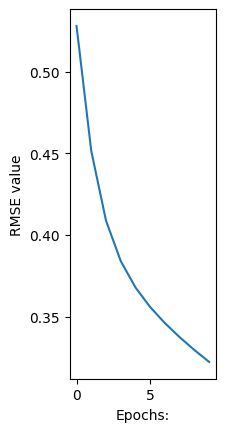

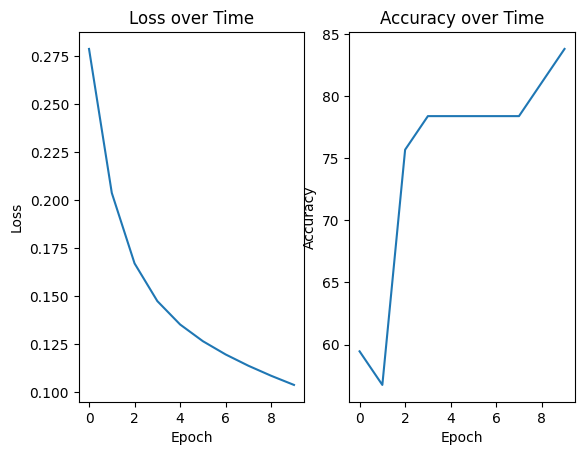

In [16]:
# Plotting accuracy
plt.subplot(1, 3, 3)
plt.plot(rm)
plt.ylabel('RMSE value')
plt.xlabel("Epochs:")
plt.show()

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(losss)
plt.title("Loss over Time")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(acc)
plt.title("Accuracy over Time")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
